In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

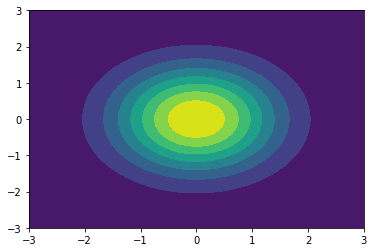

In [17]:
mean = np.zeros(2)
likelihood = stats.multivariate_normal(mean).pdf

x = np.linspace(-3, 3, 50)
X, Y = np.meshgrid(x, x)
Z = np.array([
        [likelihood(np.array([x[i], x[j]])) for i in range(50)]
    for j in range(50)
])

plt.contourf(X, Y, Z)

In [177]:
n = 1
n_mcmc = 100

sample_point = stats.multivariate_normal(mean).rvs()
repeated_particle = np.vstack([sample_point]*n)

noise = stats.multivariate_normal(mean, np.eye(2)*0.005)

x = np.zeros((2, n, n_mcmc))
x[..., 0] = repeated_particle.T
for i in range(n):
    for j in range(1, n_mcmc):
        xprop = x[:, i, j-1] + noise.rvs()
        likelihood_ratio = likelihood(xprop) / likelihood(x[:, i, j-1])

        u = np.random.uniform()
        if u < min(1, likelihood_ratio):
            x[:, i, j] = xprop
        else:
            x[:, i, j] = x[:, i, j-1]            

In [178]:
import matplotlib
%matplotlib qt
cmap = matplotlib.cm.get_cmap('Reds', n_mcmc)

fig, ax = plt.subplots()

fig.patch.set_visible(False)
ax.axis('off')


ax.contourf(X, Y, Z, cmap='Greys', alpha=0.5)
for i in range(n):
    for j in range(n_mcmc-1):
        ax.plot(x[0, i, j:j+2], x[1, i, j:j+2], marker='.', color=cmap(j))